In [47]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [48]:
%run functions.py

In [ ]:
num_days = 252

In [28]:
start = datetime.datetime(2021, 1, 1)
end  = datetime.datetime(2021, 11, 1)

In [30]:
fmfi = getStocks(['V', 'MA', 'PYPL', 'RNO.PA', 'BMW.DE'],start, end)

In [31]:
returns = fmfi/fmfi.shift(1) - 1
returns_pa = returns.mean() * num_days
returns_pa                         # rocny vynos (p.a.)

V         0.001673
MA       -0.021480
PYPL      0.060097
RNO.PA   -0.093937
BMW.DE    0.326232
dtype: float64

In [32]:
volatilities = returns.std() * np.sqrt(num_days)
sigma = returns.cov() * num_days
volatilities

V         0.228104
MA        0.260617
PYPL      0.356527
RNO.PA    0.344430
BMW.DE    0.268852
dtype: float64

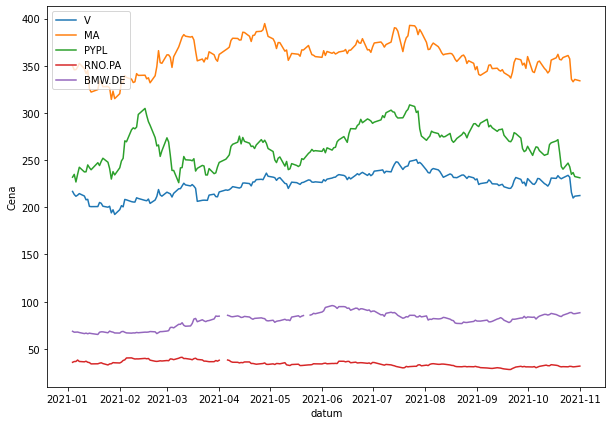

In [33]:
plt.figure(figsize=(10,7))
for s in fmfi.columns:
    plt.plot(fmfi.index,fmfi[s],label=s)

plt.legend()
plt.ylabel('Cena')
plt.xlabel('datum')
plt.show()

No handles with labels found to put in legend.


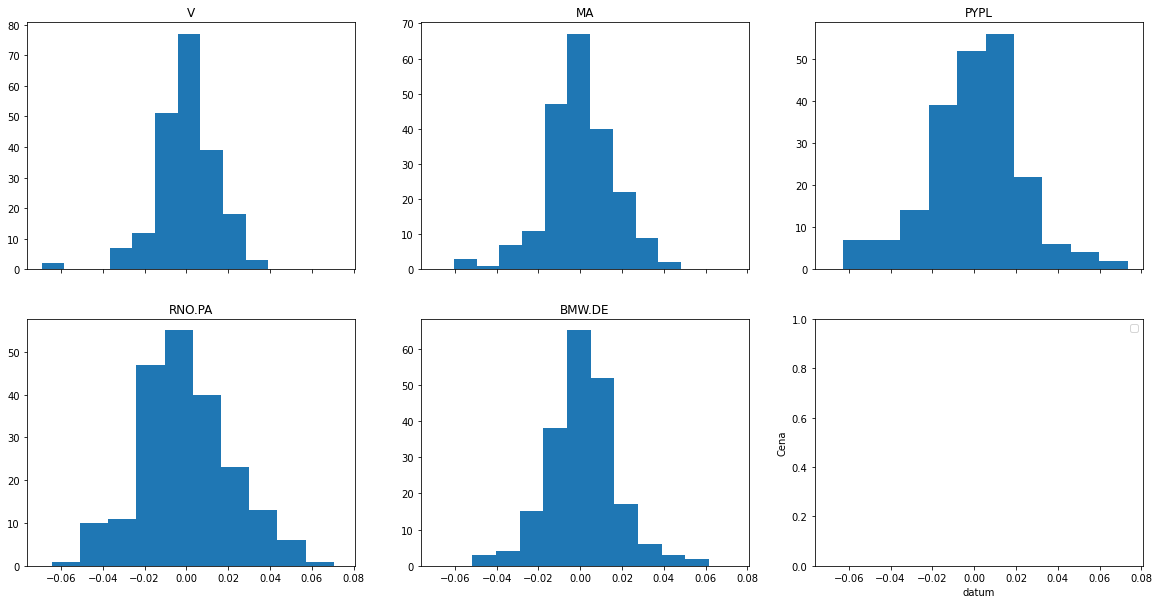

In [34]:
fig,ax = plt.subplots(2,3,figsize=(20,10), sharex=True)
for i in range(2):
    for j in range(3):
        try:
            stock = fmfi.columns[i*3+j]
            ax[i,j].hist(returns[stock])
            ax[i,j].set_title(stock)
        except IndexError:
            pass

plt.legend()
plt.ylabel('Cena')
plt.xlabel('datum')
plt.show()

In [35]:
value = [23214.5, 17889, 26969.18, 13097.16, 17551.32]
w = []
for v in value:
    w.append(v/sum(value))
w = np.array(w)
print(w)
w.sum()

[0.23515222 0.18120735 0.2731854  0.13266821 0.17778681]


1.0

In [36]:
r = np.dot(w.T,returns_pa)
print('pred. rocny vynos',r)

pred. rocny vynos 0.05845603754551369


In [37]:
volatility_fmfi = np.sqrt(np.dot(w.T,np.dot(sigma,w)))
print('pred. rocna volatilita:',volatility_fmfi)

pred. rocna volatilita: 0.1890690357479261
